In [1]:
import pandas as pd

In [3]:
from sklearn import linear_model
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Sample-data-Titanic-Survival.csv")

In [5]:
data

,Class,Age,Sex,SurvivalStatus
0,1st,29,female,survived
1,1st,1,male,survived
2,1st,2,female,died
3,1st,30,male,died
4,1st,25,female,died
...,...,...,...,...
1304,3rd,15,female,died
1305,3rd,"Missing[""Not Available""]",female,died
1306,3rd,27,male,died
1307,3rd,27,male,died


In [6]:
data.drop(data.index[(data['Age']=="Missing[\"Not Available\"]")],axis=0,inplace=True)

In [7]:
data

,Class,Age,Sex,SurvivalStatus
0,1st,29,female,survived
1,1st,1,male,survived
2,1st,2,female,died
3,1st,30,male,died
4,1st,25,female,died
...,...,...,...,...
1301,3rd,46,male,died
1304,3rd,15,female,died
1306,3rd,27,male,died
1307,3rd,27,male,died


In [8]:
encoder=preprocessing.LabelEncoder()

In [11]:
data['Class']=encoder.fit_transform(data['Class'])
data['Sex']=encoder.fit_transform(data['Class'])
data['SurvivalStatus']=encoder.fit_transform(data['SurvivalStatus'])

In [14]:
x=data.values[:,0:3]
y=data.values[:,3]

In [18]:
x.ndim

2

In [19]:
x.shape

(1046, 3)

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [24]:
X_train

array([[2, '14', 2],
       [1, '31', 1],
       [1, '40', 1],
       ...,
       [0, '19', 0],
       [2, '27', 2],
       [2, '33', 2]], dtype=object)

In [25]:
X_train=X_train.astype('int')

In [26]:
y_train=y_train.astype('int')

In [27]:
log=linear_model.LogisticRegression()

In [28]:
log.fit(X_train,y_train)

LogisticRegression()

In [36]:
ypred=log.predict(X_test)

In [37]:
print(ypred)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 0]


In [35]:
y_test=y_test.astype('int')

In [38]:
cm=confusion_matrix(y_test,ypred)

In [39]:
cm

array([[163,  34],
       [ 83,  66]], dtype=int64)

In [40]:
ac=accuracy_score(y_test,ypred)

In [42]:
ac*100

66.1849710982659

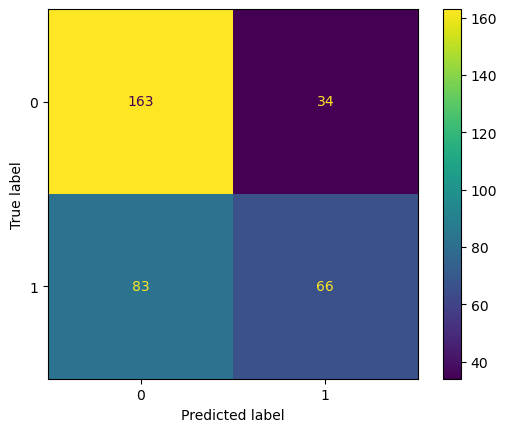

In [43]:
cm_matrix=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_matrix.plot()